In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data_src="/content/drive/MyDrive/adni4class/Dataset/"

In [ ]:
images=[]
y=[]
for d in os.listdir(data_src):
    for file in os.listdir(data_src+d):
        images.append(Image.open(data_src+d+'/'+file))
        y.append(d)

In [ ]:
X=[]
for im in images:
    a = np.array(im)
    if a.shape != (128,128):
        a.reshape(4,128,128)
        np.squeeze(a, 0)

    X.append(np.array(im))

In [ ]:
#Convert the list of data into an array
X=np.array(X)

In [ ]:
X.shape

(6410, 128, 128)

In [ ]:
X=X/255

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
non=0
mild=0
ad=0
y_num = []
for cat in y:

    if cat=="Very_Mild_Demented":
        mild+=1
        y_num.append(1)
    elif cat=="Non_Demented":
        non+=1
        y_num.append(0)
    else:
        ad+=1
        y_num.append(2)

In [ ]:
y_num

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
y=to_categorical(y_num)

In [ ]:
X=X.reshape(6410,128,128,1)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4807, 128, 128, 1) (1603, 128, 128, 1) (4807, 3) (1603, 3)


In [ ]:
cnn=Sequential()
#initially 64 convolution nodes
cnn.add(Conv2D(64,(3,3),padding="same",activation='relu',input_shape=X_train.shape[1:]))
#add a Max Pooling layer
cnn.add(MaxPooling2D())
#another 32 convolution nodes
cnn.add(Conv2D(32,(3,3),padding="same",activation='relu'))
#Add a max pooling
cnn.add(MaxPooling2D())
#Add 32 convolutions
cnn.add(Conv2D(32,(2,2),padding="same",activation='relu'))
#Add a max pooling
cnn.add(MaxPooling2D())
#Flatten before adding fully connected layer
cnn.add(Flatten())
#Add a hidden layer with 100 nodes
cnn.add(Dense(100,activation='relu'))
#Add another hidden layer with 50 nodes
cnn.add(Dense(50,activation='relu'))
#Add final output layer with 4 output nodes using softmax
cnn.add(Dense(3,activation='softmax'))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
from keras.callbacks import ModelCheckpoint , EarlyStopping
checkpoint = ModelCheckpoint("/content/drive/MyDrive/h5model/2dcnn.h5", 
                            monitor='val_accuracy',
                            verbose=1,
                            save_best_only=True)

earlystop = EarlyStopping(monitor='val_accuracy', patience=10 , verbose=1)
                          
history=cnn.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test))

Epoch 1/25
151/151 [==============================] - 12s 27ms/step - loss: 0.7292 - accuracy: 0.5758 - val_loss: 0.7205 - val_accuracy: 0.5309
Epoch 2/25
151/151 [==============================] - 3s 23ms/step - loss: 0.6215 - accuracy: 0.6911 - val_loss: 0.5671 - val_accuracy: 0.7523
Epoch 3/25
151/151 [==============================] - 3s 22ms/step - loss: 0.5324 - accuracy: 0.7454 - val_loss: 0.5763 - val_accuracy: 0.7155
Epoch 4/25
151/151 [==============================] - 3s 23ms/step - loss: 0.4182 - accuracy: 0.8107 - val_loss: 0.4155 - val_accuracy: 0.8222
Epoch 5/25
151/151 [==============================] - 3s 23ms/step - loss: 0.2931 - accuracy: 0.8768 - val_loss: 0.2934 - val_accuracy: 0.8715
Epoch 6/25
151/151 [==============================] - 4s 24ms/step - loss: 0.2097 - accuracy: 0.9207 - val_loss: 0.3971 - val_accuracy: 0.8253
Epoch 7/25
151/151 [==============================] - 4s 24ms/step - loss: 0.1561 - accuracy: 0.9386 - val_loss: 0.2301 - val_accuracy: 0.900

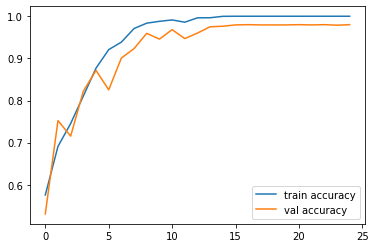

In [ ]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

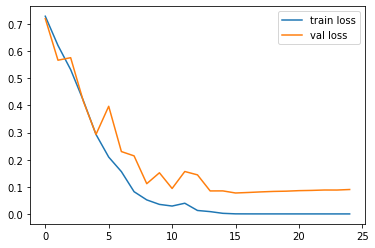

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [ ]:
y_pred=cnn.predict(X_test)


51/51 [==============================] - 1s 9ms/step


In [ ]:
y_pred

array([[9.99988198e-01, 1.18486632e-05, 1.06825804e-09],
       [3.38691029e-06, 9.99996185e-01, 4.93577716e-07],
       [9.99976754e-01, 2.32940183e-05, 3.51107760e-13],
       ...,
       [1.00000000e+00, 1.92664632e-15, 1.06572341e-19],
       [9.99993920e-01, 6.05793002e-06, 4.93409793e-08],
       [1.00000000e+00, 1.24031585e-08, 7.98212880e-16]], dtype=float32)

In [ ]:
y_val=[]
for y in y_pred:
    y_val.append(np.argmax(y))

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
y_true=[]
for y in y_test:
    y_true.append(np.argmax(y))

In [ ]:
print(confusion_matrix(y_true,y_val))

[[746  13   0]
 [ 19 808   0]
 [  0   0  17]]


In [ ]:
print(classification_report(y_true,y_val))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       759
           1       0.98      0.98      0.98       827
           2       1.00      1.00      1.00        17

    accuracy                           0.98      1603
   macro avg       0.99      0.99      0.99      1603
weighted avg       0.98      0.98      0.98      1603



In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy on test data: ",accuracy_score(y_true,y_val))

Accuracy on test data:  0.9800374298190893


In [ ]:
cnn.save('/content/drive/MyDrive/h5model/2dcnn.h5')